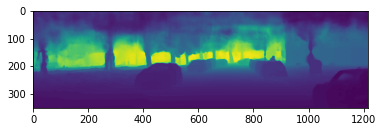

In [8]:
# 可视化深度图
import numpy as np
from pcdet.config import cfg
root_path = cfg.ROOT_DIR

import matplotlib.pyplot as plt
depth = np.load(root_path / 'data/kitti/training/image_2_depth/000010.npy')
depth_img = depth.astype('uint8') # 灰度值范围约 4-80
# plt.imshow(plt.imread(root_path / 'data/kitti/training/image_2/000010.png'))
plt.imshow(depth_img)
plt.show()

In [3]:
# 可视化点云
import open3d as o3d
data = np.load(root_path / 'data/kitti/training/velodyne_depth/000010.npy')
virpt = data[data[:, -1] == 1]
lidarpt = data[data[:, -1] == 2]
vircloud = o3d.geometry.PointCloud()
vircloud.points = o3d.utility.Vector3dVector(virpt[:, :3])
vircloud.colors = o3d.utility.Vector3dVector(virpt[:, 3:6]/255) # 颜色归一化

lidarcloud = o3d.geometry.PointCloud()
lidarcloud.points = o3d.utility.Vector3dVector(lidarpt[:, :3])
lidarcloud.paint_uniform_color([1, 0, 0])

o3d.visualization.draw_geometries([vircloud, lidarcloud])